# $\color{ForestGreen}{\text{Heart Disease Dataset}}$

In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the dataset

heart_df = pd.read_csv('../Week-6/heart.csv')     # Reading the csv source file as a dataframe
heart_df.shape

(1025, 14)

In [3]:
# Displaying a sample of 5 rows 

heart_df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
670,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
526,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
605,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
862,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0


In [4]:
# Finding the size of each class

print('Size of class 0:', len(heart_df[heart_df['target']==0]))
print('Size of class 1:', len(heart_df[heart_df['target']==1]))
print('Size of the dataset:', len(heart_df))

Size of class 0: 499
Size of class 1: 526
Size of the dataset: 1025


In [5]:
# Breaking features to continuous and categorical ones

cont_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

## $\color{ForestGreen}{\text{LDA Classifier}}$

In [6]:
# Defining the continuous features and the target of the model

X = heart_df[cont_features].values     # Features
y = heart_df['target'].values          # Target 

In [7]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [8]:
# Loading 'LinearDiscriminantAnalysis' from 'discriminant_analysis' module

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()     # Instantiating the lda classifier
lda_clf.fit(X_train, y_train)              # Fitting the train data

LinearDiscriminantAnalysis()

In [9]:
# Finding the predictions of the lda classifier for train and test subsets 

train_y_pred = lda_clf.predict(X_train)
test_y_pred = lda_clf.predict(X_test)

In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('LDA Train Classification Report: \n\n', train_report,'\n\n')
print('LDA Test Classification Report: \n\n', test_report)

LDA Train Classification Report: 

               precision    recall  f1-score   support

           0       0.75      0.67      0.71       393
           1       0.72      0.79      0.75       427

    accuracy                           0.73       820
   macro avg       0.73      0.73      0.73       820
weighted avg       0.73      0.73      0.73       820
 


LDA Test Classification Report: 

               precision    recall  f1-score   support

           0       0.77      0.68      0.72       106
           1       0.70      0.79      0.74        99

    accuracy                           0.73       205
   macro avg       0.74      0.73      0.73       205
weighted avg       0.74      0.73      0.73       205



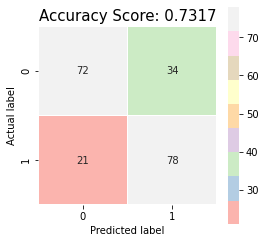

In [11]:
# Computing lda confusion matrix

lda_c_matrix = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(lda_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

In [12]:
# Finding probabilities of test instances predicted by lda classifier

lda_clf.predict_proba(X_test[:10])

array([[0.30021508, 0.69978492],
       [0.93966887, 0.06033113],
       [0.4298973 , 0.5701027 ],
       [0.20552261, 0.79447739],
       [0.96683158, 0.03316842],
       [0.11631539, 0.88368461],
       [0.94422695, 0.05577305],
       [0.29751903, 0.70248097],
       [0.15567848, 0.84432152],
       [0.7987805 , 0.2012195 ]])

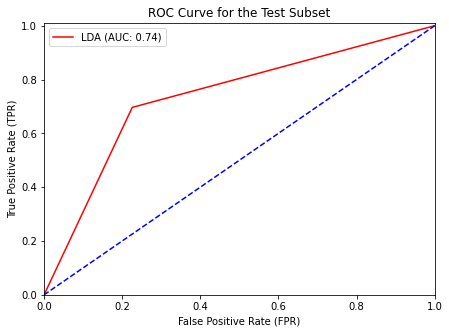

In [13]:
# Plotting the ROC curve for the test subset

from sklearn.metrics import roc_curve, auc   # Importing 'roc_curve' and 'auc' from sklearn

fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='LDA (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

## $\color{ForestGreen}{\text{QDA Classifier}}$

In [14]:
# Loading 'QuadraticDiscriminantAnalysis' from 'discriminant_analysis' module

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_clf = QuadraticDiscriminantAnalysis()      # Instantiating the QDA classifier
qda_clf.fit(X_train, y_train)                  # Fitting the training data

QuadraticDiscriminantAnalysis()

In [15]:
# Finding predictions of qda classifier for the train and test subsets

train_y_pred = qda_clf.predict(X_train)
test_y_pred = qda_clf.predict(X_test)

In [16]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('QDA Train Classification Report: \n\n', train_report,'\n\n')
print('QDA Test Classification Report: \n\n', test_report)

QDA Train Classification Report: 

               precision    recall  f1-score   support

           0       0.77      0.62      0.69       393
           1       0.70      0.82      0.76       427

    accuracy                           0.73       820
   macro avg       0.73      0.72      0.72       820
weighted avg       0.73      0.73      0.72       820
 


QDA Test Classification Report: 

               precision    recall  f1-score   support

           0       0.82      0.64      0.72       106
           1       0.69      0.85      0.76        99

    accuracy                           0.74       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.76      0.74      0.74       205



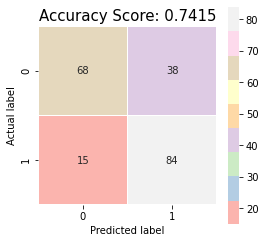

In [17]:
# Computing qda confusion matrix

qda_c_matrix = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(qda_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

In [18]:
# Finding probabilities of test instances predicted by qda classifier

qda_clf.predict_proba(X_test[:10])

array([[2.70666853e-01, 7.29333147e-01],
       [9.97776264e-01, 2.22373646e-03],
       [3.48804989e-01, 6.51195011e-01],
       [2.54502320e-01, 7.45497680e-01],
       [9.99937959e-01, 6.20405126e-05],
       [1.68813082e-01, 8.31186918e-01],
       [9.98154274e-01, 1.84572552e-03],
       [3.89295184e-01, 6.10704816e-01],
       [1.32045208e-01, 8.67954792e-01],
       [6.51547154e-01, 3.48452846e-01]])

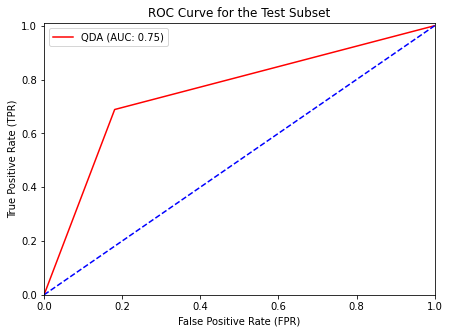

In [19]:
# Plotting the ROC curve for the test subset

from sklearn.metrics import roc_curve, auc   # Importing 'roc_curve' and 'auc' from sklearn

fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='QDA (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

## $\color{ForestGreen}{\text{Logistic Regression}}$

In [20]:
from sklearn.linear_model import LogisticRegression   # Importing Logistic Regression from sklearn

logreg = LogisticRegression(penalty = 'none', max_iter = 10000) # Instantiating logistic regression 

logreg.fit(X_train, y_train)  # Fitting the train data to 'logreg'

train_y_pred = logreg.predict_proba(X_train).argmax(axis=1)  # Predicting the class for train set
test_y_pred = logreg.predict_proba(X_test).argmax(axis=1)    # Predicting the class for test set

In [21]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Logistic Regression Train Classification Report: \n\n', train_report,'\n\n')
print('Logistic Regression Test Classification Report: \n\n', test_report)

Logistic Regression Train Classification Report: 

               precision    recall  f1-score   support

           0       0.74      0.67      0.70       393
           1       0.72      0.78      0.75       427

    accuracy                           0.73       820
   macro avg       0.73      0.73      0.73       820
weighted avg       0.73      0.73      0.73       820
 


Logistic Regression Test Classification Report: 

               precision    recall  f1-score   support

           0       0.77      0.68      0.72       106
           1       0.70      0.79      0.74        99

    accuracy                           0.73       205
   macro avg       0.74      0.73      0.73       205
weighted avg       0.74      0.73      0.73       205



## $\color{ForestGreen}{\text{Gaussian Naive Bayes Classifier}}$

In [22]:
# Loading GaussianNB from naive_bayes module

from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()            # Instantiating the gaussian naive Bayes classifier
gnb_clf.fit(X_train, y_train)     # Fitting the training data

GaussianNB()

In [23]:
# Finding the predictions of gaussian naive Bayes for train and test subsets

train_y_pred = gnb_clf.predict(X_train)
test_y_pred = gnb_clf.predict(X_test)

In [24]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Gaussian NB Train Classification Report: \n\n', train_report,'\n\n')
print('Gaussian NB Test Classification Report: \n\n', test_report)

Gaussian NB Train Classification Report: 

               precision    recall  f1-score   support

           0       0.75      0.65      0.70       393
           1       0.71      0.80      0.75       427

    accuracy                           0.73       820
   macro avg       0.73      0.72      0.72       820
weighted avg       0.73      0.73      0.73       820
 


Gaussian NB Test Classification Report: 

               precision    recall  f1-score   support

           0       0.79      0.67      0.72       106
           1       0.70      0.81      0.75        99

    accuracy                           0.74       205
   macro avg       0.74      0.74      0.74       205
weighted avg       0.74      0.74      0.74       205



## $\color{ForestGreen}{\text{Multinomial Naive Bayes Classifier}}$

In [25]:
# Defining the features and the target of the model

X = heart_df[cat_features].values     # Features
y = heart_df['target'].values      # Target 

In [26]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [27]:
# Loading MultinomialNB from naive_bayes module

from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()        # Instantiating the multinomial naive Bayes classifier
mnb_clf.fit(X_train, y_train)    # Fitting the training data

MultinomialNB()

In [28]:
# Finding the predictions of multinomial naive Bayes for train and test subsets

train_y_pred = mnb_clf.predict(X_train)
test_y_pred = mnb_clf.predict(X_test)

In [29]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Multinomial NB Train Classification Report: \n\n', train_report,'\n\n')
print('Multinomial NB Test Classification Report: \n\n', test_report)

Multinomial NB Train Classification Report: 

               precision    recall  f1-score   support

           0       0.82      0.75      0.78       393
           1       0.79      0.84      0.81       427

    accuracy                           0.80       820
   macro avg       0.80      0.80      0.80       820
weighted avg       0.80      0.80      0.80       820
 


Multinomial NB Test Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.77      0.82       106
           1       0.79      0.89      0.83        99

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [30]:
# Finding probabilities of test instances predicted by multinomial naive Bayes classifier

mnb_clf.predict_proba(X_test[:10])

array([[0.32915793, 0.67084207],
       [0.9643044 , 0.0356956 ],
       [0.45677321, 0.54322679],
       [0.650121  , 0.349879  ],
       [0.97859976, 0.02140024],
       [0.17884102, 0.82115898],
       [0.97097415, 0.02902585],
       [0.05501977, 0.94498023],
       [0.78371278, 0.21628722],
       [0.25682063, 0.74317937]])

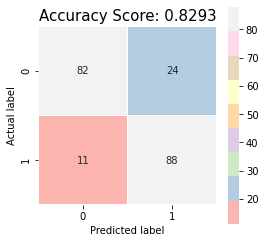

In [31]:
# Computing multinomial naive Bayes confusion matrix

mnb_c_matrix = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(mnb_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

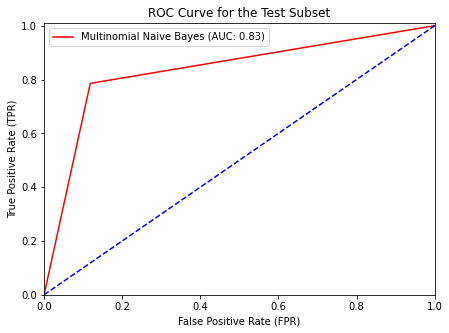

In [32]:
# Plotting the ROC curve for the test subset

from sklearn.metrics import roc_curve, auc   # Importing 'roc_curve' and 'auc' from sklearn

fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='Multinomial Naive Bayes (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()